<a href="https://colab.research.google.com/github/Samuel-OR/DataScientist/blob/main/Analisando_os_Dados_do_Airbnb_SamuelOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png"></center>

#### **Projeto Sigmoidal - Data Science na Prática 3.0**
*by [Samuel de Oliveira Ribeiro](https://www.linkedin.com/in/samuel-oliveira-ribeiro/)*


#### [**Acesso o Artigo deste projeto no Medium**](https://medium.com/@samuel-oliveira-ribeiro/an%C3%A1lise-explorat%C3%B3ria-de-dados-do-airbnb-paris-fran%C3%A7a-5dc8454a9d66)
---

# Análise dos Dados do Airbnb - Paris, França

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86957,2.36127,Entire home/apt,125,3,1,2019-01-02,0.03,1,364
1,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,64,1,250,2020-08-08,2.63,1,23
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,93,9,273,2020-02-26,2.26,2,209
3,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.07,1,352
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 51040 entradas e 74 variáveis (`listings.csv.gz`).

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 51040
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 25% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,002% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.243358
last_review                       0.243358
host_name                         0.001587
name                              0.000960
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [8]:
df = df.fillna({"last_review": 0.0})

### **Q3. Qual o tipo de distribuição das variáveis?** 

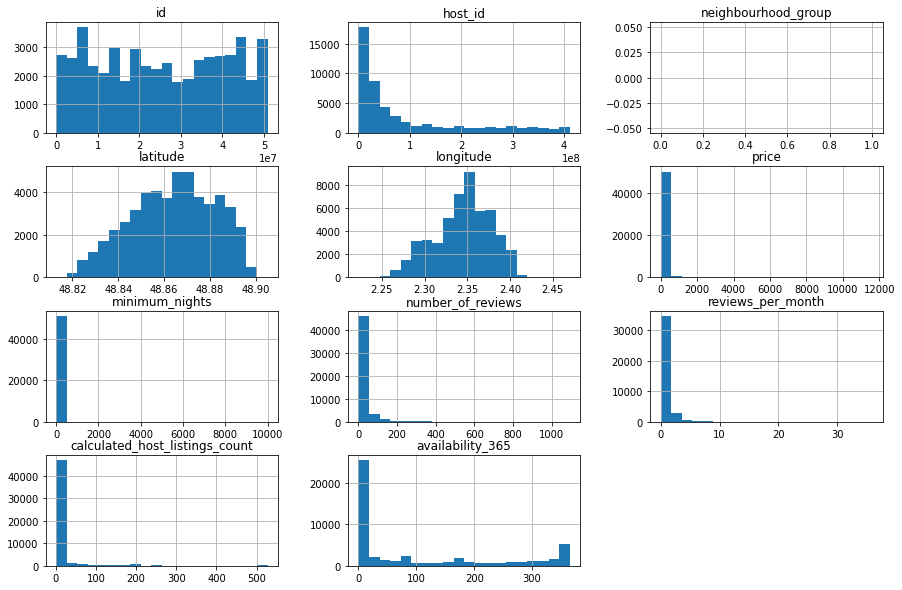

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 20, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [10]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,51040.000000,51040.000000,51040.000000,38619.000000,51040.000000,51040.000000
mean,124.526607,111.238656,20.262441,0.711934,14.815831,105.081172
std,246.523539,169.569734,43.403127,1.058283,61.755875,134.751091
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,85.000000,4.000000,5.000000,0.360000,1.000000,18.000000
75%,130.000000,365.000000,20.000000,0.900000,2.000000,200.000000
max,11600.000000,9999.000000,1093.000000,35.880000,527.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 130, porém seu valor máximo é 11600.
* Até 75% das pessoas alugam por até 365 noites (`minimum_nights`).
* A variável `minimum_nights` possui muitos valores abaixo de 4 (Pelo menos 50% de todos os dados)


#### Boxplot para minimum_nights

minimum_nights | Valores acima de 365:
21 entradas
0.0411%


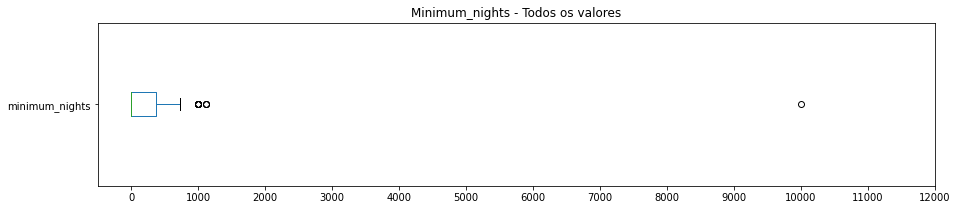

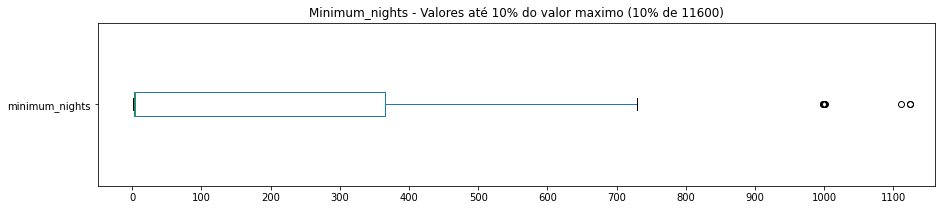

In [13]:
days = 365
# ver quantidade de valores acima de 365 dias para minimum_nights
print("minimum_nights | Valores acima de {}:".format(days))
print("{} entradas".format(len(df[df.minimum_nights > days])))
print("{:.4f}%".format((len(df[df.minimum_nights > days]) / df.shape[0])*100))

# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3), xticks=[x for x in range(0,11600+1000, 1000)])
plt.title("Minimum_nights - Todos os valores")
plt.show()

# minimum_nights com limite de 10% do maior valor de minimum_nights (1160)
df.minimum_nights.plot(kind='box', vert=False, xlim=(-50,1160), figsize=(15,3), xticks=[x for x in range(0,1160+100, 100)]);
plt.title("Minimum_nights - Valores até 10% do valor maximo (10% de 11600)")
plt.show()

#### Boxplot para price

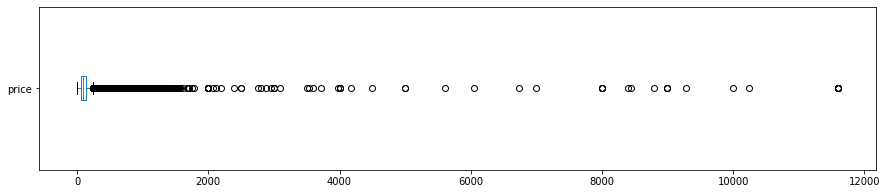


price: valores acima de 500
907 entradas
1.7770%

59 Valores zeros na variável price


In [14]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

valor = 500
# ver quantidade de valores acima de 300 para price
print("\nprice: valores acima de {}".format(valor))
print("{} entradas".format(len(df[df.price > valor])))
print("{:.4f}%".format((len(df[df.price > valor]) / df.shape[0])*100))

# ver quantidade de valores iguais a 0 para price
print("\n{} Valores zeros na variável price".format(len(df[df.price == 0])))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

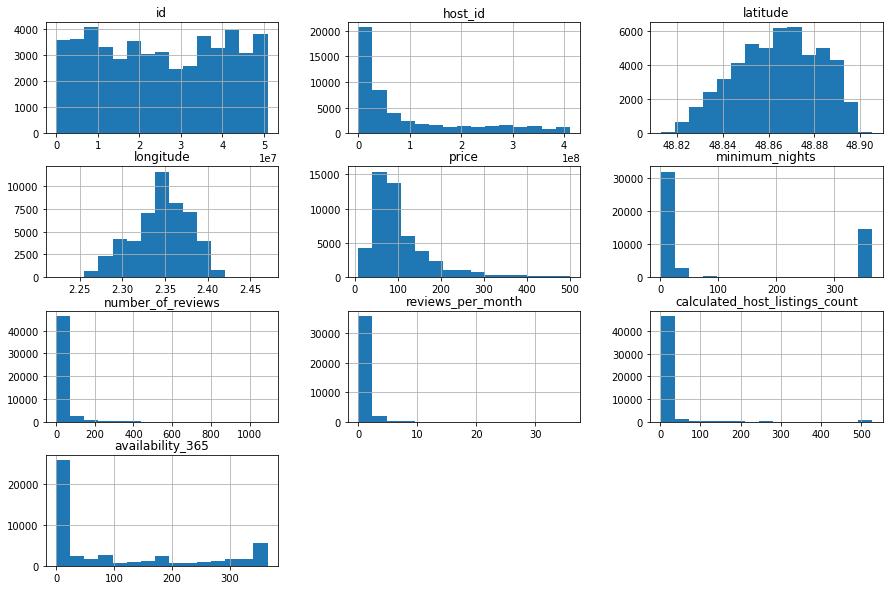

In [15]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True) #Removendo dados com valor 0 em price
df_clean.drop(df_clean[df_clean.minimum_nights > 365].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

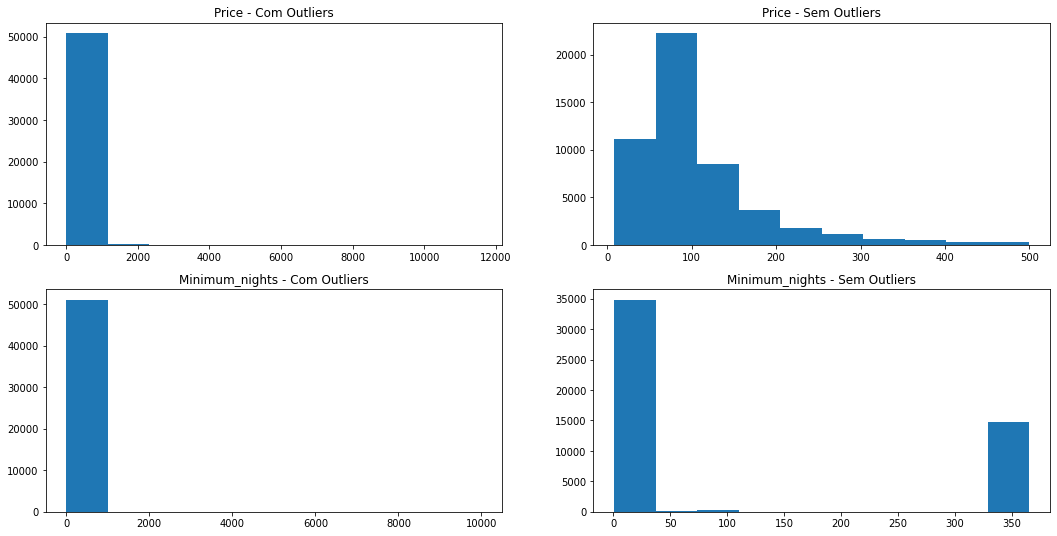

In [16]:
# plotar o histograma Antes x Depois para as variáveis modificadas (Outliers)

f, axarr = plt.subplots(2,2, sharey=False,sharex=False, tight_layout=False, figsize=(18,9))
axarr[0,0].set_title('Price - Com Outliers')
axarr[0,0].hist(df['price']);

axarr[0,1].set_title('Price - Sem Outliers')
axarr[0,1].hist(df_clean['price']);

axarr[1,0].set_title('Minimum_nights - Com Outliers')
axarr[1,0].hist(df['minimum_nights']);

axarr[1,1].set_title('Minimum_nights - Sem Outliers')
axarr[1,1].hist(df_clean['minimum_nights']);

plt.savefig("Histograma.png" ,format='png')


### **Q5. Qual a média dos preços de aluguel?**




In [35]:
# ver a média da coluna `price`
df_clean.price.mean()

107.24248296805386

A média dos preços de aluguel é 107,24 € (Aproximadamente R$ 661,52 com a cotação do dia 24/08/2021).


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [36]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.135773,0.014546,0.052874,0.112082,0.283697
minimum_nights,-0.135773,1.000000,-0.201036,-0.259126,-0.119904,-0.288038
number_of_reviews,0.014546,-0.201036,1.000000,0.705394,-0.024787,0.186088
reviews_per_month,0.052874,-0.259126,0.705394,1.000000,0.023422,0.251082
calculated_host_listings_count,0.112082,-0.119904,-0.024787,0.023422,1.000000,0.112785
availability_365,0.283697,-0.288038,0.186088,0.251082,0.112785,1.000000


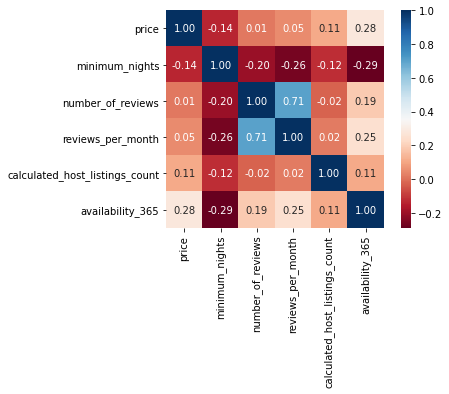

In [37]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True,);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [38]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    41339
Private room        7240
Hotel room          1119
Shared room          355
Name: room_type, dtype: int64

In [40]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0] )*100

Entire home/apt    82.590454
Private room       14.464667
Hotel room          2.235630
Shared room         0.709248
Name: room_type, dtype: float64

In [59]:
# mostrar a quantidade de cada tipo de imóvel disponível com minimun_nights menor igual 10
df_clean[df_clean.room_type =='Entire home/apt'].minimum_nights.value_counts() / df_clean[df_clean.room_type =='Entire home/apt'].minimum_nights.count()

365    0.352815
2      0.166235
3      0.122741
1      0.113791
4      0.060330
         ...   
325    0.000024
70     0.000024
199    0.000024
110    0.000024
95     0.000024
Name: minimum_nights, Length: 68, dtype: float64

A média dos preços de aluguel é 107,24 € (Aproximadamente R$661,52 com a cotação do dia 24/08/2021). 
Desses 82,59% de apartamentos e casas, 1/3 alugam pelo período mínimo de 1 ano (365 dias). O provável publico alvo desses estabelecimentos são famílias ou grupos de amigos que estão viajando a trabalho/estudo na cidade.

### **Q8. Qual a localidade mais cara e mais barata de Paris?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [41]:
# ver preço médio por bairros. Mais Caros.
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).head(10)

neighbourhood
Élysée            163.392960
Louvre            159.804170
Luxembourg        148.466883
Palais-Bourbon    147.633634
Hôtel-de-Ville    144.243163
Bourse            137.800790
Temple            135.395806
Passy             131.229414
Panthéon          124.046226
Opéra             122.435390
Name: price, dtype: float64

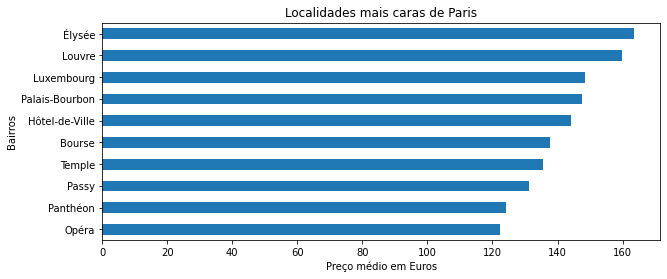

In [43]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,4));
plt.ylabel("Bairros");
plt.xlabel("Preço médio em Euros");
plt.title("Localidades mais caras de Paris")
plt.savefig("Barras_localidade_mais_cara.png" ,format='png')

No gráfico acima foi listado os 10 bairros mais caros de Paris, levando em consideração o preço médio do aluguel. Claramente o custo por noite é bastante elevado, em reais, para ficar localizado no Élysés, será preciso desembolsar em média R$1007,89 por noite. Vale considerar que você estará próximo de vários pontos turísticos como a via Champs Élysées, Teatro Ópera Garnier, Palácio Le Palais de L’Élyséee e a Praça Place le la Concorde.

Ok, é um valor bem caro para nós, meros brasileiros, que temos a moeda real. Pensando nisso foi feito a listagem dos 10 Bairros mais baratos. Para quem estiver priorizando economizar com hospedagem é uma boa alternativa analisar o custo por bairro quando for planejar a viagem. O valor médio do bairro mais barato ficou em €73,53 (R$453,58) por noite.

In [42]:
# ver preço médio por bairros. Mais Baratos.
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True).head(10)

neighbourhood
Ménilmontant            73.539096
Buttes-Chaumont         74.301497
Gobelins                83.686285
Buttes-Montmartre       84.317510
Reuilly                 86.257885
Popincourt              92.723834
Observatoire            93.546344
Entrepôt                98.597887
Batignolles-Monceau     99.608096
Vaugirard              103.989734
Name: price, dtype: float64

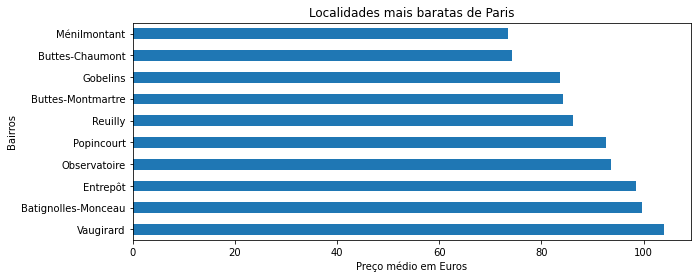

In [44]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True).head(10).sort_values(ascending=False).plot(kind='barh', figsize=(10,4));
plt.ylabel("Bairros");
plt.xlabel("Preço médio em Euros");
plt.title("Localidades mais baratas de Paris")

plt.savefig("Barras_localidade_mais_barata.png" ,format='png')

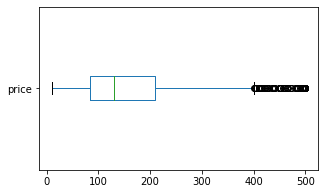

count    1392.00000
mean      163.39296
std       109.20522
min        10.00000
25%        83.00000
50%       130.00000
75%       210.00000
max       500.00000
Name: price, dtype: float64

In [45]:
#Avaliando as metricas do Élysée
df_clean.price[df_clean.neighbourhood == "Élysée"].plot(kind='box', vert=False, figsize=(5, 3) )
plt.show()

df_clean.price[df_clean.neighbourhood == "Élysée"].describe()

Lembra-se que, **estamos aqui tratando dos valores médios do preço**, logo há imóveis com valores menores e maiores que a média. Sendo assim, foi observado que é possível você ficar hospedado no bairro mais caro e pagar um valor menor. **Na imagem abaixo temos a lista dos 10 imóveis mais baratos para alugar no Élysée, bairro mais caro.**

In [46]:
#Listando 10 imovéis mais baratos do Bairro Élysée
df_show = df_clean[df_clean.neighbourhood=='Élysée'][['name','room_type','neighbourhood','minimum_nights', 'price']].sort_values(['price']).head(10)
df_show

,name,room_type,neighbourhood,minimum_nights,price
35543,D'Anjou - Lovely 1 bdr close to La Madeleine,Entire home/apt,Élysée,365,10
42821,Little Studio Champs Elysées,Entire home/apt,Élysée,3,10
26234,Studio near Champs Élysées / Concorde and Oper...,Private room,Élysée,4,12
47192,Comfortable Studio in the heart Paris,Shared room,Élysée,1,16
41900,ARC DE TRIOMPHE studio shared with host,Shared room,Élysée,2,20
17790,Cozy Studio in 8ème,Private room,Élysée,3,25
46048,Bright airy room in the heart of Paris.,Private room,Élysée,30,25
44291,Magnifique chambre appartement haussmanien,Private room,Élysée,30,26
33066,"Studio meublé, très bien placé BAIL DE MOBILITÉ",Entire home/apt,Élysée,30,27
25323,Petit Studio Paris 8eme,Private room,Élysée,4,28


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

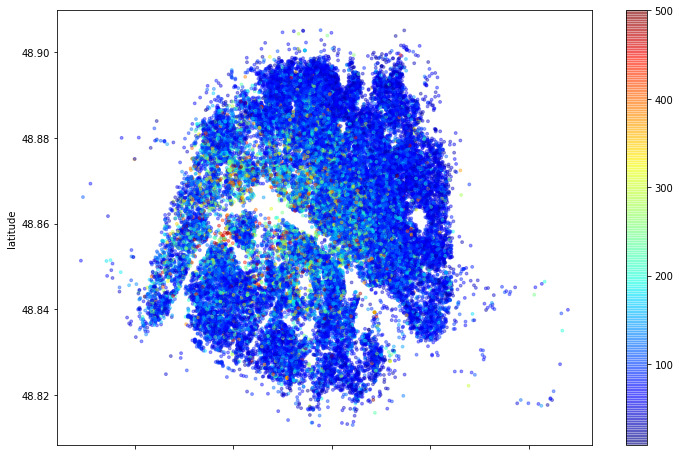

In [47]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para alugar um imóvel em paris? (minimum_nights)?**

In [61]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

111.85984856052585

In [62]:
# ver a descrição do `minimum_nights``
df_clean.minimum_nights.describe()

count    50053.000000
mean       111.859849
std        163.714499
min          1.000000
25%          2.000000
50%          4.000000
75%        365.000000
max        365.000000
Name: minimum_nights, dtype: float64

Em paris, **a média de noites mínimas que os imóveis exigem é 111 noites**. Muito né? Esse valor é alto pois como **temos muitos dados registrados com aluguel mínimo de 365 dias**, a média vai lá pra cima.

Foi visto que **50% dos imóveis solicitam pelo menos 4 noites**. Esse dado é relativo ao 2º Quartil na análise descritiva dos dados. **A partir de 50% dos dados temos que a solicitação é 365 dias.**

*“Humm, mas pra que eu quero saber isso?”*

Suponha que você quer alugar um imóvel por 1 ano. É possível verificar, por bairro, onde tem mais imóvel com essa disponibilidade. Assim, você não perderá tempo procurando esse imóvel em um bairro que você sabe que não tem essa disponibilidade.

Essas informações também **demostra a rotatividade média dos locadores**. Em média um determinado imóvel fica ocupado por 111 dias. **Então, caso queira algum imóvel especifico é bom se planejar com bastante antecedência.**


### **Q10. Quais dias as pessoas mais ficam hospedadas em Paris?**

In [49]:
#Top 5 Pacotes de noites mais adquiridos
df_acumulate_nights = df_clean.minimum_nights.value_counts().head(10) / df_clean.minimum_nights.count()

print("Qtd_Dias\t% do Total")
print(df_acumulate_nights*100);

Qtd_Dias	% do Total
365    29.352886
1      18.760114
2      17.185783
3      11.953329
4       5.650011
30      5.092602
5       4.385352
7       2.245620
6       1.508401
10      0.559407
Name: minimum_nights, dtype: float64


In [50]:
#Intervalo de 1 a 7 dias de aluguel
print( sum((df_acumulate_nights*100).sort_index().head(7)) )

61.68861007332228


Baseado na contagem da variavel 'minimun_nights' é observado que **29,35% dos alugueis foram feitos para 1 ano (365 dias)**. Superficialmente podemos dizer que essas pessoas estão indo não a turismo e sim a trabalho.

Já outros **61,69% dos aluguéis são feitos para um periódo de 1 a 7 dias**. Podemos inferir que a maioria dos turistas estão nesse grupo.

E para você** que tem um imóvel em paris e deseja oferta-lo no Airbnb**, a quantidade de **turista que passar um curto período de tempo é maior que os que solicitam imóveis para 1 ano ou mais.** Então fica a dica para quando for disponibilizar seu imóvel. Senão fosse assim não teria tantos imóveis num período tão curto.

## Conclusões



Com base nessa analise superficial dos dados podemos observar a presença de alguns outiliers nas variavéis de preço e minimo de noites.
Também foi percebido que há 2 grupos bem definidos de pessoas que alugam os imoveis:
* Pessoas que alugam por um curto periodo de tempo, representando 61,69% (até 7 dias)
* E Pessoas que alugam pelo periodo de 1 ano, representando 29,35%. Podemos inferir que essas pessoas vão a cidade a trabalho, estudo ou moradia.

O tipo de imóvel mais alugado é a home/apt (Casa ou apartamento) sendo este 82,58% dos imoveis. Em seguida temos o Private room (Quarto privado) com 14,69%, o Hotel room (Quarto de hotel) com 2,00% e o Shared room (Quarto compartilhado) com apenas 0,73%

Apesar do valor médio de aluguel ser €97,38 é possivel encontrar imoveis no bairro Louvre pagando €25. Como estamos avaliando a base de dados resumida não é possivel esclarecermos o que torna este aluguel barato em relação os demais.



**Sou Samuel de Oliveira, aprendiz na área de Ciência de Dados. Se conecte comigo no [LinkedIn](https://www.linkedin.com/in/samuel-oliveira-ribeiro/).**